In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normal(x, mu, std):
    return np.exp(-np.square(x-mu)/(2*std**2))/np.sqrt(2*np.pi*std**2)

In [3]:
n_applicants = 1000000

races = ["White American", "Hispanic", "African American", "Asian American", "Native American"]

demographics = {
    "White American": 0.733,
    "Hispanic": 0.17,
    "African American": 0.126,
    "Asian American": 0.05,
    "Native American": 0.01
}

means = {
    "White American": 712.7,
    "African American": 622.2,
    "Native American": 657.5,
    "Asian American": 726.2,
    "Hispanic": 649.6
}

stds = {race: 50 for race in demographics}

In [4]:
applicants = {race: int(n_applicants * demographics[race]) for race in races}
n = sum(applicants.values())


In [5]:
dem_scores = {race: np.random.normal(means[race], stds[race], applicants[race]) for race in races}
scores = np.concatenate(tuple(dem_scores[race] for race in races))

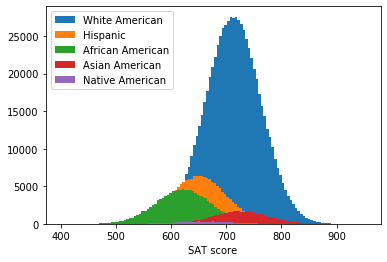

In [6]:
for race in races:
    plt.hist(dem_scores[race], label=race, bins=100)
plt.xlabel("SAT score")
plt.legend()

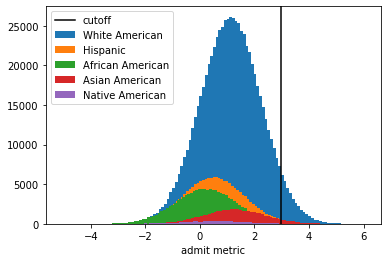

In [11]:
def calc_admit_metrics(scores):
    test_metrics = (scores - 600)/100
    other_metrics = np.random.normal(0, 1, scores.shape)
    total = test_metrics + other_metrics
    return total

dem_admit_metrics = {race: calc_admit_metrics(dem_scores[race]) for race in races}
admit_metrics = np.concatenate(tuple(dem_admit_metrics[race] for race in races))
cutoff = sorted(admit_metrics, reverse=True)[int(0.04*n)]

for race in races:
    plt.hist(dem_admit_metrics[race], label=race, bins=100)
plt.axvline(cutoff, color="black", label="cutoff")
plt.xlabel("admit metric")
plt.legend()


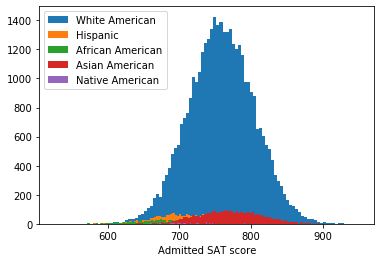

In [12]:
admitted_scores = {race: dem_scores[race][dem_admit_metrics[race] > cutoff] for race in races}

for race in races:
    plt.hist(admitted_scores[race], label=race, bins=100)
plt.xlabel("Admitted SAT score")
plt.legend()

In [13]:
for race in races:
    num_admit = len(admitted_scores[race])
    mean = np.mean(admitted_scores[race])
    admit_rate = num_admit / applicants[race]
    print(race)
    print("\tAdmitted Mean %.2f,\tApplicant Mean %.2f\t# Admitted %.0f, \t# Applied %.0f, Admit Rate %.3f" % (mean, means[race], num_admit, applicants[race], admit_rate))
    

White American
	Admitted Mean 759.03,	Applicant Mean 712.70	# Admitted 36970, 	# Applied 733000, Admit Rate 0.050
Hispanic
	Admitted Mean 708.17,	Applicant Mean 649.60	# Admitted 2274, 	# Applied 170000, Admit Rate 0.013
African American
	Admitted Mean 686.04,	Applicant Mean 622.20	# Admitted 902, 	# Applied 126000, Admit Rate 0.007
Asian American
	Admitted Mean 770.09,	Applicant Mean 726.20	# Admitted 3274, 	# Applied 50000, Admit Rate 0.065
Native American
	Admitted Mean 711.31,	Applicant Mean 657.50	# Admitted 140, 	# Applied 10000, Admit Rate 0.014
